# Introduction
This notebook is a practice notebook to use Deep Neural Networks to recognize numbers using the NMIST or the CIFAR10 image set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras as k
import sklearn as sk
from sklearn.datasets import fetch_openml
import tensorflow as tf

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

2 Physical GPUs, 1 Logical GPU


We start with the fashion_mnist data set just to practice

In [3]:
tf.random.set_seed(42) # For repeatability
(X_train_full, y_train_full), (X_test, y_test) = k.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

We shall follow using a DNN with 20 hidden layers and 100 neurons

In [4]:
X_train[0].shape

(28, 28)

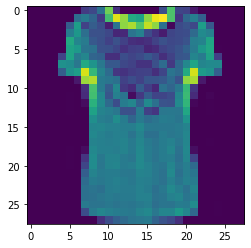

In [6]:
plt.imshow(X_train[1])

In [9]:
unique_vals = []
for y in y_test:
    if y in unique_vals:
        continue
    else:
        unique_vals.append(y)
print(len(unique_vals))

10


In [10]:
model_mnist = k.models.Sequential()
model_mnist.add(k.layers.Flatten(input_shape = X_train[0].shape))
model_mnist.add(k.layers.Dense(20,activation='elu' ))
model_mnist.add(k.layers.Dense(200,activation='elu'))
model_mnist.add(k.layers.Dense(100,activation='elu'))
model_mnist.add(k.layers.Dense(len(unique_vals),activation='softmax'))


In [12]:
model_mnist.compile(loss="sparse_categorical_crossentropy",
              optimizer=k.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [14]:
callbacks = k.callbacks.EarlyStopping(patience=20)

history = model_mnist.fit(X_train,y_train,
            epochs = 100, validation_data=(X_valid,y_valid),
            callbacks=callbacks)

Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3874 - accuracy: 0.8620 - val_loss: 0.3961 - val_accuracy: 0.8592
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3862 - accuracy: 0.8628 - val_loss: 0.3951 - val_accuracy: 0.8608
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3848 - accuracy: 0.8633 - val_loss: 0.4048 - val_accuracy: 0.8552
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3835 - accuracy: 0.8634 - val_loss: 0.3934 - val_accuracy: 0.8598
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3830 - accuracy: 0.8639 - val_loss: 0.3921 - val_accuracy: 0.8620
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3815 - accuracy: 0.8650 - val_loss: 0.3903 - val_accuracy: 0.8646
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3802 - accuracy: 0.8656 - val_loss: 0.3892 - val_ac

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

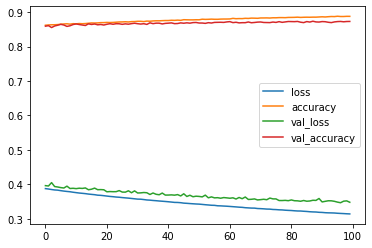

In [21]:
plt.figure()
for key in history.history.keys():

    plt.plot(history.history[key],label=key)

plt.legend()

In [29]:
model_mnist.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 0.8630


[0.3839142620563507, 0.8629999756813049]

In [31]:
y_pred = model_mnist.predict(X_train[:2])

In [32]:
y_pred

array([[2.6736187e-04, 9.9088043e-05, 1.7612454e-01, 6.2683561e-05,
        7.2324288e-01, 2.5777982e-09, 9.9725835e-02, 1.1779052e-14,
        4.7764176e-04, 3.4235495e-10],
       [7.5304151e-01, 2.6318830e-05, 6.6077788e-03, 4.3140448e-04,
        1.4883376e-05, 5.2009246e-09, 2.3961124e-01, 3.6049500e-11,
        2.6681015e-04, 5.7935285e-08]], dtype=float32)

The following corresponds to the cifar10 dataset

In [7]:
tf.random.set_seed(42) # For repeatability
(X_train_full, y_train_full), (X_test, y_test) = k.datasets.cifar10.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Let's add some early stopping

In [8]:
early_stopping = k.callbacks.EarlyStopping(patience=20)
model_checkpoint = k.callbacks.ModelCheckpoint('Question8.h5',save_best_only=True)
run_index =1
callbacks = [early_stopping,model_checkpoint]

In [9]:
model_20 = k.models.Sequential()
model_20.add(k.layers.Flatten(input_shape = [32,32,3]))

n_hidden = 100
for _ in range(20):
    model_20.add(k.layers.Dense(n_hidden,activation='elu',kernel_initializer='he_normal'))
model_20.add(k.layers.Dense(10, activation = 'softmax'))

In [10]:
model_20.compile(loss="sparse_categorical_crossentropy",
              optimizer=k.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [11]:
history = model_20.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 5s 3ms/step - loss: 2.1469 - accuracy: 0.2276 - val_loss: 1.9695 - val_accuracy: 0.2720
Epoch 2/100
1407/1407 [==============================] - 5s 4ms/step - loss: 1.8313 - accuracy: 0.3387 - val_loss: 1.9423 - val_accuracy: 0.2990
Epoch 3/100
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7507 - accuracy: 0.3686 - val_loss: 2.1032 - val_accuracy: 0.2844
Epoch 4/100
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6932 - accuracy: 0.3916 - val_loss: 2.2766 - val_accuracy: 0.2618
Epoch 5/100
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6480 - accuracy: 0.4031 - val_loss: 1.7368 - val_accuracy: 0.3652
Epoch 6/100
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6125 - accuracy: 0.4224 - val_loss: 1.6861 - val_accuracy: 0.3862
Epoch 7/100
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5768 - accuracy: 0.4315 - val_loss: 1.7217 - val_ac

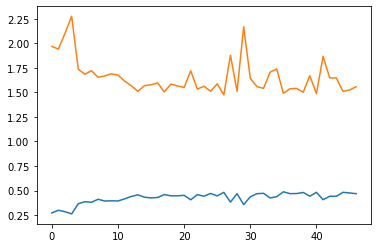

In [12]:
history.history.keys()
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])

We use the mnist set:

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = k.datasets.mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]